In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn import metrics#参数，roc和auc
from sklearn.preprocessing import label_binarize#二值化
import joblib
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False


In [11]:
#.划分测试集合训练集

x=df.iloc[:,0:-1]
y=df.iloc[:,-1:]

x=x.replace("inf", np.NAN)

#通过平局值来替换nan
#imputer = SimpleImputer(missing_values="NaN")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x=imputer.fit_transform(x,y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("训练样本数量:%d,特征属性数目:%d,目标属性数目:%d"%(x_train.shape[0],x_train.shape[1],y_train.shape[1]))

训练样本数量:1302589,特征属性数目:28,目标属性数目:1


In [10]:
names0 = ["AmismatchRate","A_Qrate","UmismatchRate","U_Qrate","GmismatchRate","G_Qrate","del_rate","label0"]#df.columns
names = ["AmismatchRate","A_Qrate","UmismatchRate","U_Qrate","GmismatchRate","G_Qrate","del_rate","label"]#df.columns
path1="./new.paper-unlabled.csv"
path2="./new.treat.csv"
# path1="~/project/t3_ontnewrna/output/paper-unlabled/TrainData/CrandomForestTrainData.csv"
# path2="~/project/t3_ontnewrna/output/OV-FTO-2-0603/TrainData/TrandomForestTrainData.csv"
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df1["label0"]=0
df2["label0"]=1
df=pd.concat([df1,df2])
df = df[df["coverage"]>=0.8]
df = df[names0]
df=df.replace([np.inf, -np.inf], np.nan)
df.eval("""
Am_AQ = AmismatchRate*A_Qrate
Am_Um = AmismatchRate*UmismatchRate
Am_UQ = AmismatchRate*U_Qrate
Am_Gm = AmismatchRate*GmismatchRate
Am_GQ = AmismatchRate*G_Qrate
Am_del = AmismatchRate*del_rate
AQ_Um = A_Qrate*UmismatchRate
AQ_UQ = A_Qrate*U_Qrate
AQ_Gm = A_Qrate*GmismatchRate
AQ_GQ = A_Qrate*G_Qrate
AQ_del = A_Qrate*del_rate
Um_UQ = UmismatchRate*U_Qrate
Um_Gm = UmismatchRate*GmismatchRate
Um_GQ = UmismatchRate*G_Qrate
Um_del = UmismatchRate*del_rate
UQ_Gm = U_Qrate*GmismatchRate
UQ_GQ = U_Qrate*G_Qrate
UQ_del = U_Qrate*del_rate
Gm_GQ = GmismatchRate*G_Qrate
Gm_del = GmismatchRate*del_rate
GQ_del = G_Qrate*del_rate
label = label0
""",inplace=True)
# df.eval("label = label0",inplace=True)
df=df.drop("label0",axis=1)
print(df.shape)
df

(1628237, 29)


,AmismatchRate,A_Qrate,UmismatchRate,U_Qrate,GmismatchRate,G_Qrate,del_rate,Am_AQ,Am_Um,Am_UQ,...,Um_Gm,Um_GQ,Um_del,UQ_Gm,UQ_GQ,UQ_del,Gm_GQ,Gm_del,GQ_del,label
7,0.0125,0.0550,0.0063,0.0238,0.0047,0.0099,0.1033,0.000688,0.000079,0.000298,...,0.000030,0.000062,0.000651,0.000112,0.000236,0.002459,0.000047,0.000486,0.001023,0
8,0.0033,0.0181,0.0000,0.0000,0.0166,0.0397,0.0399,0.000060,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000659,0.000662,0.001584,0
9,0.0015,0.0041,0.0167,0.0761,0.0091,0.0231,0.0621,0.000006,0.000025,0.000114,...,0.000152,0.000386,0.001037,0.000693,0.001758,0.004726,0.000210,0.000565,0.001435,0
10,0.0062,0.0212,0.0062,0.0257,0.0109,0.0284,0.0884,0.000131,0.000038,0.000159,...,0.000068,0.000176,0.000548,0.000280,0.000730,0.002272,0.000310,0.000964,0.002511,0
12,0.0163,0.0746,0.0245,0.1150,0.0245,0.0651,0.1240,0.001216,0.000399,0.001874,...,0.000600,0.001595,0.003038,0.002818,0.007487,0.014260,0.001595,0.003038,0.008072,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888632,0.0347,0.0949,0.0146,0.0586,0.0037,0.0224,0.1645,0.003293,0.000507,0.002033,...,0.000054,0.000327,0.002402,0.000217,0.001313,0.009640,0.000083,0.000609,0.003685,1
888639,0.0202,0.1093,0.0289,0.1585,0.0190,0.0420,0.2755,0.002208,0.000584,0.003202,...,0.000549,0.001214,0.007962,0.003011,0.006657,0.043667,0.000798,0.005235,0.011571,1
888640,0.0136,0.0592,0.0195,0.0946,0.0161,0.0362,0.1511,0.000805,0.000265,0.001287,...,0.000314,0.000706,0.002946,0.001523,0.003425,0.014294,0.000583,0.002433,0.005470,1
888653,0.0246,0.0965,0.0320,0.1712,0.0269,0.0771,0.1046,0.002374,0.000787,0.004212,...,0.000861,0.002467,0.003347,0.004605,0.013200,0.017908,0.002074,0.002814,0.008065,1


In [30]:
feat_labels = df.columns[0:-1]
feat_labels

Index(['AmismatchRate', 'A_Qrate', 'UmismatchRate', 'U_Qrate', 'GmismatchRate',
       'G_Qrate', 'del_rate', 'Am_AQ', 'Am_Um', 'Am_UQ', 'Am_Gm', 'Am_GQ',
       'Am_del', 'AQ_Um', 'AQ_UQ', 'AQ_Gm', 'AQ_GQ', 'AQ_del', 'Um_UQ',
       'Um_Gm', 'Um_GQ', 'Um_del', 'UQ_Gm', 'UQ_GQ', 'UQ_del', 'Gm_GQ',
       'Gm_del', 'GQ_del'],
      dtype='object')

In [13]:
# ss = MinMaxScaler()
#x_train
# y_train
ss = MinMaxScaler()
x_train2 = x_train
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train2 = ss.transform(x_train2)
y12 = []
for i in y_test["label"]:
    y12.append(i)
rf = RandomForestClassifier(n_estimators=100,criterion="gini",max_depth=30,oob_score=True,random_state=1)
rf.fit(x_train,y_train)
feat_labels = df.columns[1:-2]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
#joblib.dump(rf, "test.pkl")


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


NameError: name 'feat_labels' is not defined

In [29]:
importances
len(importances)

28

In [26]:
indices

array([ 2, 21, 18,  8, 24, 13, 19,  3,  9, 16, 20, 10, 23,  5, 14, 22, 27,
        1, 26,  4, 11, 15, 25, 17,  0, 12,  7,  6], dtype=int64)

In [31]:
for f in range(x_train.shape[1]):
#     print(indices[f])
    print("%2d) %-*s %f" % (f + 1, 28, feat_labels[indices[f]], importances[indices[f]]))

 1) UmismatchRate                0.108631
 2) Um_del                       0.105714
 3) Um_UQ                        0.095327
 4) Am_Um                        0.062634
 5) UQ_del                       0.045103
 6) AQ_Um                        0.044639
 7) Um_Gm                        0.042376
 8) U_Qrate                      0.041374
 9) Am_UQ                        0.035033
10) AQ_GQ                        0.034061
11) Um_GQ                        0.030348
12) Am_Gm                        0.028936
13) UQ_GQ                        0.028436
14) G_Qrate                      0.027399
15) AQ_UQ                        0.026764
16) UQ_Gm                        0.022030
17) GQ_del                       0.021749
18) A_Qrate                      0.020193
19) Gm_del                       0.019377
20) GmismatchRate                0.019289
21) Am_GQ                        0.019075
22) AQ_Gm                        0.018405
23) Gm_GQ                        0.018072
24) AQ_del                       0

In [ ]:
score = rf.score(x_test,y_test)
score2 = rf.score(x_train2,y_train)
#score2 = rf.socre(x_train,y_train)
print("准确率：%.2f%%"%(score*100))
print("准确率：%.2f%%"%(score2*100))
cv_results = cross_validate(rf,x_train,y_train,return_train_score=True)
print(cv_results["train_score"].mean())
print(cv_results["test_score"].mean())
forest_y_score1 = rf.predict(x_test)
forest_y_score1

In [5]:
forest_y_score = rf.predict_proba(x_test)
p1,p2=[],[]
for j in forest_y_score:
    p1.append(j[0])
    p2.append(j[1])
with open("x_test.csv","w") as opf:
    opf.write("AmismatchRate,UmismatchRate,GmismatchRate,CmismatchRate,label,predict,prob1,prob2\n")
    for i in x_test:
        opf.write(",".join(map(str, i))+"\n")
# xtest = pd.read_csv("./x_test.csv")
# xtest["label"] = y12
# xtest["predict"] = forest_y_score1
# xtest["prob1"] = p1
# xtest["prob2"] = p2
# xtest.to_csv("xtest.csv",index=False,sep=',')
# print(x_test)
# print(x_test.shape)
# print(forest_y_score)
# print(forest_y_score.shape)
#print(y_test[names[-1]])
# forest_y_score = rf.predict_proba(x_test)
# print(forest_y_score)
#计算roc和auc
forest_fpr1, forest_tpr1, _ = metrics.roc_curve(label_binarize(y_test[names[-1]],classes=[0,1,2]).T[0:-1].T.ravel(), forest_y_score.ravel())
#AUC值
auc1 = metrics.auc(forest_fpr1, forest_tpr1)
print ("5EU目标属性AUC值：", auc1)

5EU目标属性AUC值： 0.9326860542329201


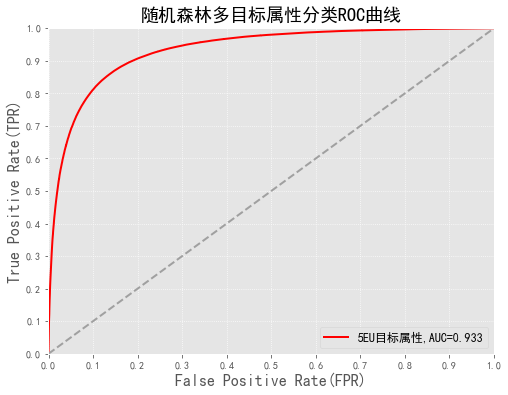

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6), facecolor='w')
plt.plot(forest_fpr1,forest_tpr1,c='r',lw=2,label=u'5EU目标属性,AUC=%.3f' % auc1)
plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)', fontsize=16)
plt.ylabel('True Positive Rate(TPR)', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'随机森林多目标属性分类ROC曲线', fontsize=18)
plt.show()